In [1]:
import matplotlib.pyplot as plt
import sys
from os.path import dirname
sys.path.append(dirname('./synthcity/src/'))

In [2]:
from synthcity.plugins import Plugins
from synthcity.benchmark import Benchmarks
from synthcity.plugins.core.dataloader import TimeSeriesDataLoader
from sklearn.preprocessing import MinMaxScaler
from synthcity.utils.datasets.time_series.sine import SineDataloader

In [3]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
from gretel_synthetics.timeseries_dgan.dgan import DGAN
from gretel_synthetics.timeseries_dgan.config import DGANConfig

In [5]:
from gretel_synthetics.timeseries_dgan.config import DfStyle

In [6]:
static, temporal, observation_times, outcome = SineDataloader().load()

In [7]:
data = TimeSeriesDataLoader(
    temporal_data=temporal,
    observation_times=observation_times,
    static_data=static,
    outcome = outcome,
)

Unique Temporal Data
finding max len
Checking Outcome
Pack raw data
Running initializer


In [51]:
model = DGAN(DGANConfig(
    max_sequence_len=10,
    sample_len=10,
    batch_size=32,
    apply_feature_scaling=True,
    apply_example_scaling=False,
    use_attribute_discriminator=False,
    generator_learning_rate=1e-4,
    discriminator_learning_rate=1e-4,
    epochs=1000,
))

In [52]:
model.train_dataframe(
    data.dataframe(),
    attribute_columns=["seq_out_0", "seq_static_0", "seq_static_1","seq_static_2", "seq_static_3"],
    feature_columns=["seq_temporal_0", "seq_temporal_1", "seq_temporal_2", "seq_temporal_3", "seq_temporal_4"],
    time_column = "seq_time_id",
    example_id_column = "seq_id",
    df_style = DfStyle.LONG
)

In [14]:
data.dataframe()

,seq_id,seq_time_id,seq_static_0,seq_static_1,seq_static_2,seq_static_3,seq_temporal_0,seq_temporal_1,seq_temporal_2,seq_temporal_3,seq_temporal_4,seq_out_0
0,0,0,0.497547,0.755786,0.719150,0.53048,-0.097364,-0.272234,0.716361,-0.037039,-0.951068,1
1,0,1,0.497547,0.755786,0.719150,0.53048,0.495805,0.559448,0.999980,0.487927,-0.783676,1
2,0,2,0.497547,0.755786,0.719150,0.53048,0.906552,0.994212,0.707527,0.870627,-0.517946,1
3,0,3,0.497547,0.755786,0.719150,0.53048,0.983749,0.723601,0.007479,0.999474,-0.187222,1
4,0,4,0.497547,0.755786,0.719150,0.53048,0.698994,-0.060392,-0.696877,0.836900,0.166995,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,99,5,0.186788,0.026424,0.355328,0.56145,0.989680,0.196058,0.913758,-0.702031,0.097601,0
996,99,6,0.186788,0.026424,0.355328,0.56145,0.718833,-0.572294,0.998472,-0.959886,-0.603359,0
997,99,7,0.186788,0.026424,0.355328,0.56145,0.176311,-0.988033,0.953006,-0.974984,-0.984266,0
998,99,8,0.186788,0.026424,0.355328,0.56145,-0.432845,-0.795006,0.783286,-0.743506,-0.843065,0


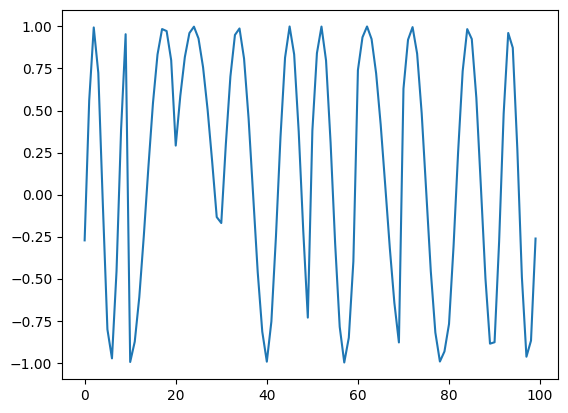

In [31]:
plt.plot(data.dataframe()['seq_temporal_1'][:100])

In [53]:
synthetic_df_dopple = model.generate_dataframe(int(len(data.dataframe())/10))

In [54]:
synthetic_df_dopple

,seq_id,seq_time_id,seq_static_0,seq_static_1,seq_static_2,seq_static_3,seq_temporal_0,seq_temporal_1,seq_temporal_2,seq_temporal_3,seq_temporal_4,seq_out_0
0,0,0,0.175410,0.990960,0.976072,0.111929,0.673402,0.347852,-0.550885,0.257197,-0.620410,0.916290
1,0,1,0.175410,0.990960,0.976072,0.111929,0.758280,0.571046,0.144839,-0.219137,-0.042026,0.916290
2,0,2,0.175410,0.990960,0.976072,0.111929,0.848475,0.618312,0.523209,0.281278,0.686714,0.916290
3,0,3,0.175410,0.990960,0.976072,0.111929,0.311411,0.616394,0.136703,0.920943,0.616620,0.916290
4,0,4,0.175410,0.990960,0.976072,0.111929,0.201542,0.380072,0.655202,0.743806,0.798530,0.916290
...,...,...,...,...,...,...,...,...,...,...,...,...
995,99,5,0.952884,0.990972,0.955053,0.036549,0.021424,-0.320556,0.703028,0.658708,0.774727,0.132335
996,99,6,0.952884,0.990972,0.955053,0.036549,-0.202852,-0.370866,0.795557,-0.028536,0.792147,0.132335
997,99,7,0.952884,0.990972,0.955053,0.036549,0.296981,-0.624307,0.656819,0.129983,0.556486,0.132335
998,99,8,0.952884,0.990972,0.955053,0.036549,-0.017827,-0.657265,0.832273,-0.423652,-0.288041,0.132335


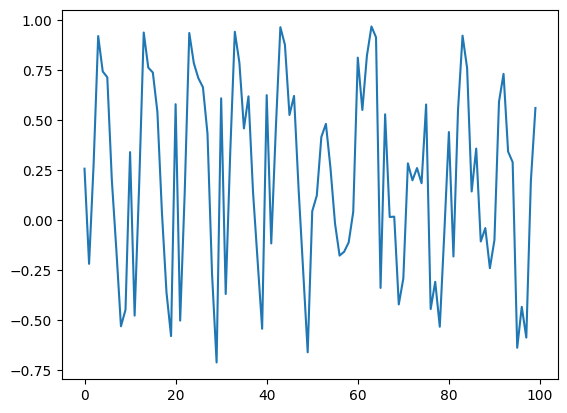

In [55]:
plt.plot(synthetic_df_dopple['seq_temporal_3'][:100])